#### Display related

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

def show_state(observation, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(observation, cmap='gray')
    plt.title("%s | Step: %d %s" % (env.spec.id, step, info))
    plt.axis('off')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.close()

#### Preprocessing

In [120]:
import cv2
import numpy as np

def downsize(img_arry):
    return cv2.resize(img_arry, dsize=(76, 100), interpolation=cv2.INTER_CUBIC)

def rgb2gray(img_arr):
    return np.dot(img_arr[...,:3], [0.299, 0.587, 0.114])

def normalize(img_arr):
    return np.divide(img_arr, 256)

def preprocess_image(img_arr):
    downsized = downsize(observation)
    gray = rgb2gray(downsized)
    return normalize(gray)
    

#### Main loop

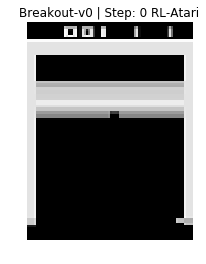

In [121]:
import gym
env = gym.make("Breakout-v0")
observation = env.reset()

for _ in range(500):
    observation = env.render(mode='rgb_array')
    preprocessed = preprocess_image(observation)
    show_state(preprocessed, 0, "RL-Atari")
    
    action = env.action_space.sample() # your agent here (this takes random actions)
    observation, reward, done, info = env.step(action)
    